In [1]:
import nltk
import json
from datetime import datetime

In [2]:
statements = []

with open("data/nsa.json", "r") as infile:
    statements = json.load(infile)

for statement in statements:
    statement['datetime'] = datetime.strptime(statement['date'], '%Y-%m-%d')

In [20]:
text = ' '.join([statement['statement'].lower() for statement in sorted(statements, key=lambda k: k['datetime'])])
corpus = nltk.Text(text.split())

In [4]:
corpus.concordance("NSA")

Displaying 25 of 247 matches:
ave been changing at a dramatic pace. NSA requires nearly complete re-tooling t
 Agency. The report mandates that the NSA manage its modernization effort as th
h individual technology effort within NSA as a major acquisition program. As th
qualified technical experts to review NSA operations. The Technical Advisory Gr
 With limited available resources the NSA has maintained its day-to-day readine
he security of the United States that NSA be modernized. One of the most import
 of its magnitude and complexity, the NSA invites superlatives and outsize comp
otential take is so much greater. The NSA was intended to be the world's premie
es and satellites in the heavens. The NSA rose to dominance in what were, in te
 needed to get in their path. And the NSA did this better than anyone else, usi
 22,000 miles above Earth. It was the NSA that first reported the presence of S
 missiles in Cuba in 1962. It was the NSA that first warned of the Tet offensiv
ietnam in 

In [5]:
corpus.concordance("Snowden")

Displaying 12 of 12 matches:
ny years. With WikiLeaks and Edward Snowden spilling our beans every day, what 
bamaCare. With WikiLeaks and Edward Snowden spilling our beans every day, what 
Sebelius. With WikiLeaks and Edward Snowden spilling our beans every day, what'
ral Eric Holder. I want to know how Snowden got his hands on so much of the nat
 of Moscow's granting asylum to Mr. Snowden and its backing of President Bashar
ths ago a man by the name of Edward Snowden lit up the airwaves with his illega
ational Security Agency played. Mr. Snowden provided a titillating, mesmerizing
grim. Following the leaks by Edward Snowden beginning in June last year of high
 of U.S. phone records since Edward Snowden exposed the program nearly two year
eir phone calls. This is called the Snowden revelation. Under the banner of nat
 was unlawfully disclosed by Edward Snowden 2 years ago, which is why we are ab
l Security Agency contractor Edward Snowden leaked documents that exposed the N


In [6]:
corpus.common_contexts(["Snowden"])

mr._and edward_beginning edward_2 edward_spilling edward_lit
edward_exposed edward_leaked how_got the_revelation. mr._provided


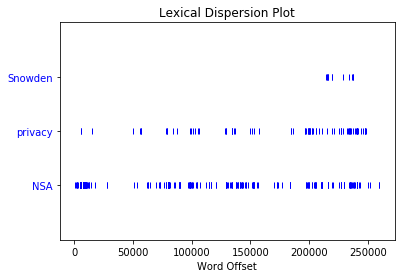

In [7]:
corpus.dispersion_plot(["Snowden", "privacy", "NSA"])

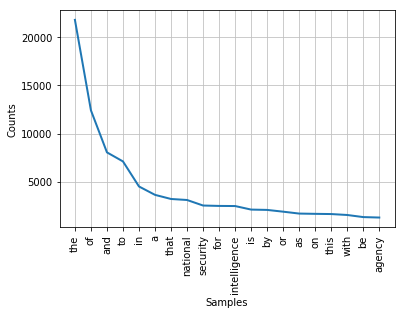

In [21]:
fdist = nltk.FreqDist(corpus)
fdist.plot(20, cumulative=False)

In [9]:
corpus.collocations()

National Security; United States; Security Agency; Security Agency,;
(50 U.S.C.; national security; Central Intelligence; Federal Bureau;
National Reconnaissance; Security Agency.; Inspector General; Select
Committee; intelligence community; Foreign Intelligence; National
Geospatial-Intelligence; fiscal year; Defense Intelligence;
Intelligence Surveillance; Reconnaissance Office.; law enforcement


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [14]:
sid.polarity_scores(text)

{'compound': 1.0, 'neg': 0.062, 'neu': 0.778, 'pos': 0.16}

In [15]:
dems = 0.0
for statement in statements:
    if statement["party"] == "Democrat":
        dems += 1.
print dems / len(statements)

0.436274509804


In [16]:
republican_text = ' '.join([statement['statement'] for statement in sorted(statements, key=lambda k: k['datetime']) if statement['party'] == "Republican"])

In [17]:
democrat_text = ' '.join([statement['statement'] for statement in sorted(statements, key=lambda k: k['datetime']) if statement['party'] == "Democrat"])

In [18]:
sid.polarity_scores(republican_text)

{'compound': 1.0, 'neg': 0.081, 'neu': 0.762, 'pos': 0.157}

In [19]:
sid.polarity_scores(democrat_text)

{'compound': 1.0, 'neg': 0.073, 'neu': 0.765, 'pos': 0.162}